Assignment - 1 (2019AIML622)


1. Train a Perceptron

In [44]:
# reading sample data from the Assignment

# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

X = [
  [2,3],
	[4,5],
	[11,11],
	[4,11],
	[12,5],
	[5,2],
	[6,1],
	[6,3],
	[2,10],
	[4,7],
  [13,8],
  [1,6],
  [6,9],
  [10,12],
  [8,3],
  [2,8]]
  
y = [0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1]

X = np.array(X)


## 1.1 - Implementing the perception training rule

In [45]:
## Designing a percetron

class Perceptron(object):

  def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rand = np.random.RandomState(self.random_state)
    self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for x, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(x))
        self.weights[1:] += update * x
        self.weights[0] += update
        errors += int(update != 0.0)
        self.errors_.append(errors)
      return self

  def net_input(self, X):
    z = np.dot(X, self.weights[1:]) + self.weights[0]
    return z

  def predict(self, X):
    return np.where(self.net_input(X) >= 0, 1, -1)

  

In [46]:
# 1. Implement the perceptron training rule and get the appropriate parameters for a single perceptron.
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def calculate_weights(train, learning_rate, epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + learning_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + learning_rate * error * row[i]
	return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, learning_rate, epoch):
	predictions = list()
	weights = calculate_weights(train, learning_rate, epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

In [47]:
learning_rate = 0.01
epoch = 100
weights = calculate_weights(X, learning_rate, epoch)
print('Learning Rate : ' + str(learning_rate))
print('Epoch : '+str(epoch))
print('Weights : ' + str(weights))

Learning Rate : 0.01
Epoch : 100
Weights : [87.99999999999979, 561.0000000000061]


## 1.2 - Plotting the data points


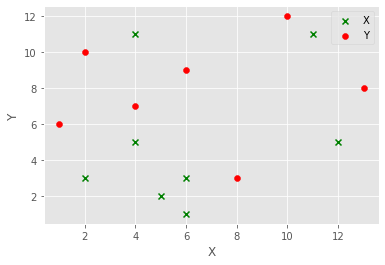

In [48]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.scatter(X[:8, 0], X[:8, 1],
            color='green', marker='x', label='X')
plt.scatter(X[8:15, 0], X[8:15, 1],
            color='red', marker='o', label='Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.show()

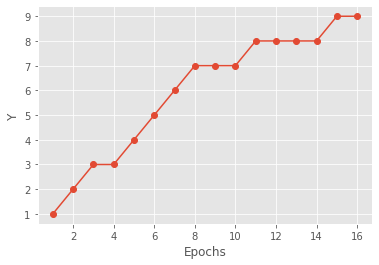

In [49]:
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X, y)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Y')
plt.show()

## 1.3 - schematic diagram of the trained perceptron with learned weights

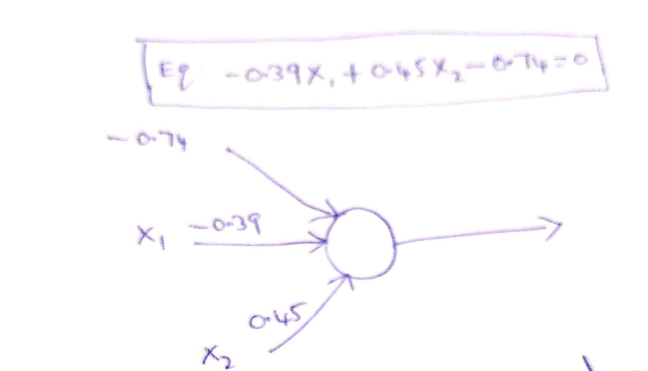

## 2. Training a Neural Network

## 2.1 - Implementing Single hidden layer MLP

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]


In [51]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorboard
tensorboard.__version__

'2.4.0'

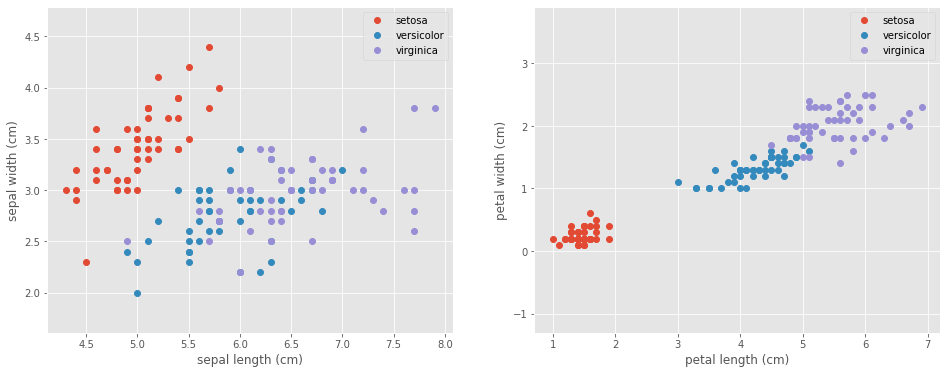

In [52]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## 2.2.i - Use keras to design the NN model and train on the iris data

In [53]:
# Traing model, find trainable/non-trainable params
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

In [54]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.55086749792099
Test accuracy: 0.8133333325386047
Model name: model_2
Test loss: 0.1788719743490219
Test accuracy: 0.9333333373069763
Model name: model_3
Test loss: 0.40859881043434143
Test accuracy: 0.9200000166893005


## 2.2.ii - Draw the schematic diagram of the NN 2 along with all the weights and
##  specify suitable activation function. How many trainable parameters are there?

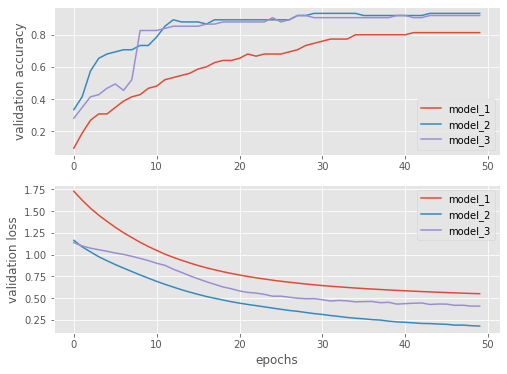

In [55]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

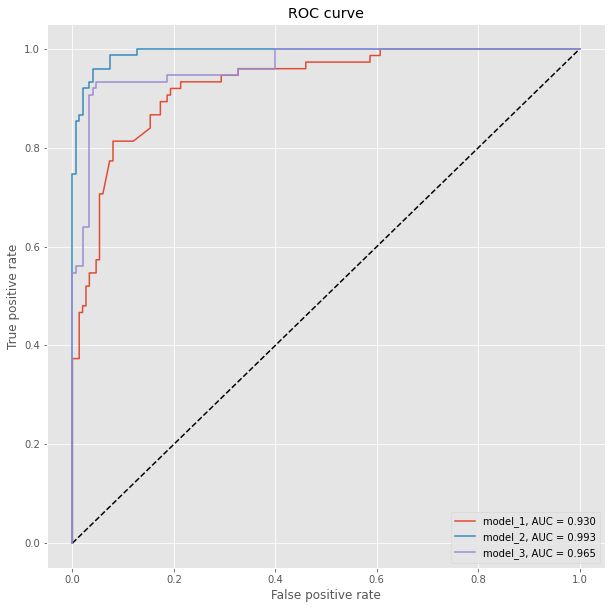

In [56]:
## visualizing the model

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [57]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.94 (+/- 0.08)


In [58]:
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_86 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_88 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_89 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

Assignment Ends